**CodSoft Task 2**

**Sales Prediction**

**Importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [3]:
ad_df=pd.read_csv('sample_data/advertising.csv')
ad_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Basic statictical information of the dataset**

In [4]:
ad_df.shape

(200, 4)

In [5]:
ad_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
#finding the datatypes of data in each field
ad_df.info()
#by the output we can see there are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Data Visualization**

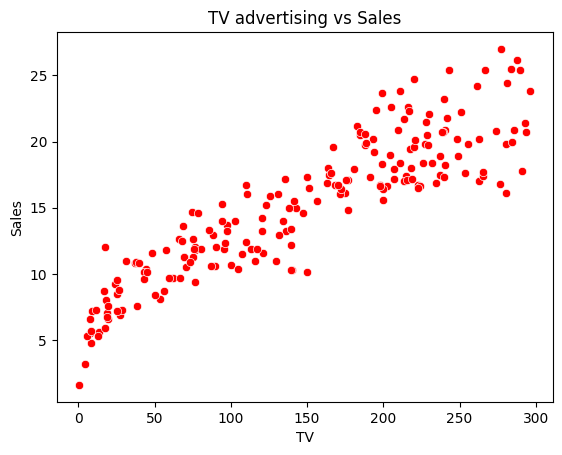

In [35]:
#scatterplots
sns.scatterplot(x='TV',y='Sales',color='red',data=ad_df)
plt.title('TV advertising vs Sales')
plt.show()

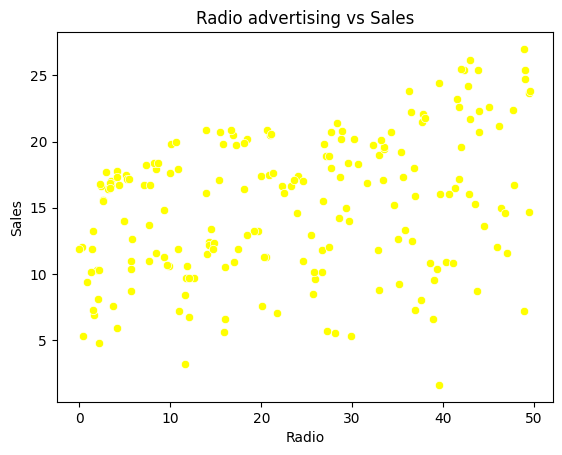

In [36]:
sns.scatterplot(x='Radio',y='Sales',color='yellow',data=ad_df)
plt.title('Radio advertising vs Sales')
plt.show()

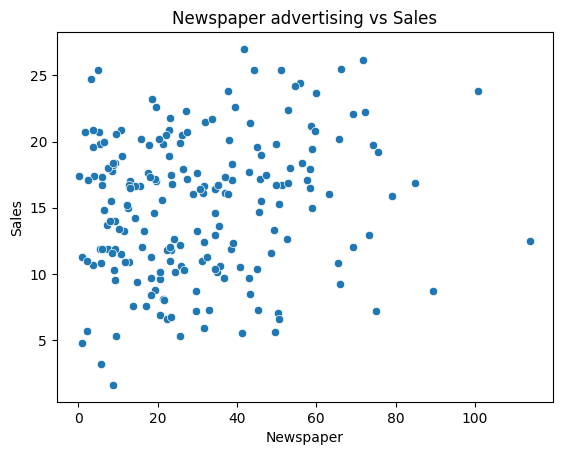

In [9]:
sns.scatterplot(x='Newspaper',y='Sales',data=ad_df)
plt.title('Newspaper advertising vs Sales')
plt.show()

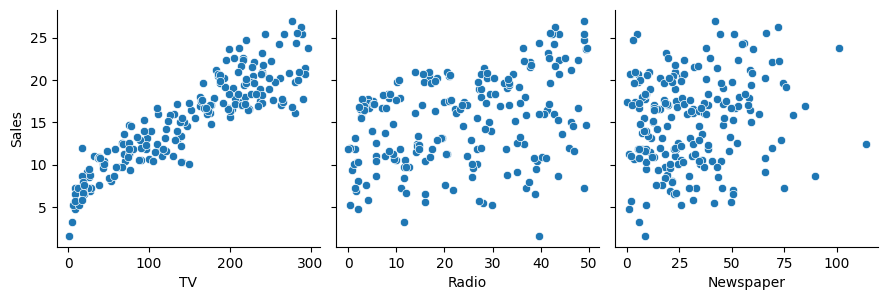

In [13]:
sns.pairplot(ad_df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=3)
plt.show()

**Correlation**

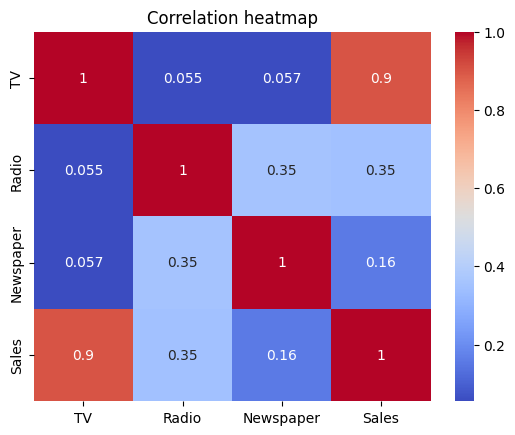

In [16]:
#heatmap
#cmap=color of the map
#annot=True, adds the numerical values to the cells in the heatmap
correlation_matrix=ad_df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title('Correlation heatmap')
plt.show()

Tv and Sales have positive correlation

order : TV>Radio>Newspaper

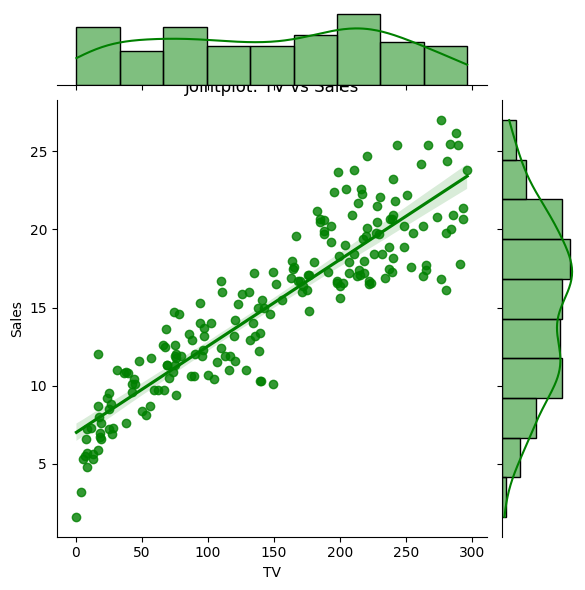

In [30]:
#jointplot
sns.jointplot(x='TV',y='Sales',data=ad_df,kind='reg',color='green',height=6)
plt.title('Jointplot: TV vs Sales')
plt.show()

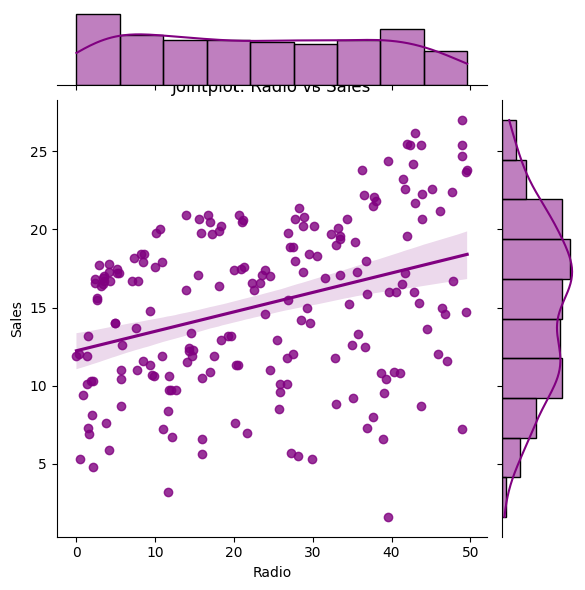

In [32]:
sns.jointplot(x='Radio',y='Sales',data=ad_df,kind='reg',color='purple',height=6)
plt.title('Jointplot: Radio vs Sales')
plt.show()

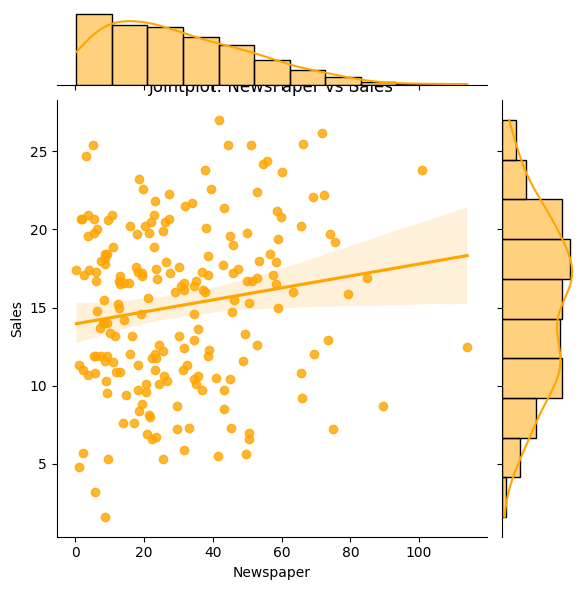

In [38]:
sns.jointplot(x='Newspaper',y='Sales',data=ad_df,kind='reg',color='orange',height=6)
plt.title('Jointplot: NewsPaper vs Sales')
plt.show()

**Training the model**

Linear Regression algorithm is used.

In our project we need to predicit the value of sales which is continuous variable (eg : 22 units , 100 units), hence linear regression is suitable for this.

If our target variable is binary(Eg : if the customer will buy or not) then classification algorithms are suitable

In [40]:
from sklearn.model_selection import train_test_split
X=ad_df.drop(columns='Sales')
Y=ad_df['Sales']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)


In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [44]:
#training the data
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [53]:
#prediction
predictions=model.predict(x_test)
print(predictions)

[15.8584001  10.25455219  8.3433945  18.20597781 18.24404472 17.22677655
  8.88540573 22.06145662 12.56591147 20.91199861  9.80180521 20.17988033
 10.76506947  9.31801269 17.12326355 10.61197768  8.82613242 17.4148004
 18.27755197 19.35562321 18.91947218 19.34912455 11.32777397 10.89230486
 17.88617384 14.5807791  16.6335762   9.38704301 18.77527466 17.10618533
 19.97740506 16.4226044  15.81783294 14.13744233  8.15700828 12.19303194
 21.91220851 21.439974   19.44373753 19.63736243 22.73481375 17.50903243
 21.92044496 15.07866493 21.44389522 19.10169368 17.92298552  8.94609413
 10.47446887 10.48082118 13.83216009 17.27350066 18.91227953 18.1543629
  9.40322845 15.83433527  8.99652241  5.32107233  7.88454671 25.0400331 ]


In [52]:
print(y_test)

112    17.1
29     10.5
182     8.7
199    18.4
193    19.6
85     20.2
10     12.6
54     20.2
115    12.6
35     17.8
12      9.2
92     19.4
13     13.7
126     6.6
174    16.5
2      12.0
44      8.5
3      16.5
113    20.9
14     19.0
23     20.5
25     17.0
6      11.8
134    10.8
165    16.9
173    16.7
45     16.1
65     11.3
48     19.8
122    16.6
178    16.8
64     16.0
9      15.6
57     13.2
78      5.3
71     12.4
128    24.7
176    20.2
131    17.7
53     21.2
137    20.8
163    18.0
111    21.8
123    15.2
109    19.8
141    19.2
41     17.1
130     1.6
140    10.9
5       7.2
159    12.9
100    16.7
11     17.4
187    17.3
24      9.7
89     16.7
66     11.0
8       4.8
172     7.6
175    27.0
Name: Sales, dtype: float64


**Evaluation**

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
#average of absolute difference between actual values(y_test) and predicted values
mae=mean_absolute_error(y_test,predictions)
mse=mean_squared_error(y_test,predictions)
print("Mean absolute error is ",mae);
print("Mean squared error is ",mse);

Mean absolute error is  1.3528888703682265
Mean squared error is  3.422684076942015


In [49]:
print('Coefficients : ', model.coef_)

Coefficients :  [0.05446427 0.10784353 0.00144899]


For every one unit increase in the TV advertising budget, the model predicts an increase in sales of approximately 0.0544 units.

For every one unit increase in the Radio advertising budget, the model predicts an increase in sales of approximately 0.107 units.

For every one unit increase in the Newspaper advertising budget, the model predicts an increase in sales of approximately 0.001 units.

**Building a predictive model**

In [54]:
input_data=[44.5,39.3,45.1]
input_data_as_array=np.asarray(input_data)
print(input_data_as_array)
input_data_reshaped=input_data_as_array.reshape(1,-1)
print(input_data_reshaped)
prediction=model.predict(input_data_reshaped)
print("Predicted value is : ",prediction)

[44.5 39.3 45.1]
[[44.5 39.3 45.1]]
Predicted value is :  [11.35201952]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
